In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
import plotly.express as px
from chart_studio import plotly
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
import calendar

In [2]:
df = pd.read_csv("Datos/original.csv")
df = df.drop(["Pressure(in)", "End_Time", "Start_Lat", "Start_Lng", "End_Lat", "End_Lng", "Description", "Number", "Street", "Side", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Sunrise_Sunset", "Nautical_Twilight", "Astronomical_Twilight"], axis = 1)
df.dropna(inplace=True)
df.head()

,ID,Severity,Start_Time,Distance(mi),City,County,State,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Civil_Twilight
0,A-2716600,3,2016-02-08 00:37:08,3.230,Dublin,Franklin,OH,42.1,58.0,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
5,A-2716605,3,2016-02-08 07:53:43,0.500,Cincinnati,Hamilton,OH,37.0,93.0,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
9,A-2716609,2,2016-02-08 11:51:46,0.521,Cleveland,Cuyahoga,OH,33.1,92.0,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day
11,A-2716611,2,2016-02-08 15:16:43,0.826,Westerville,Franklin,OH,32.0,100.0,0.5,West,3.5,0.05,Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
12,A-2716612,2,2016-02-08 15:43:50,0.307,Cincinnati,Hamilton,OH,33.8,100.0,3.0,NNW,4.6,0.03,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day


In [3]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Severity,Distance(mi),Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,977072.00000,977072.00000,977072.00000,977072.00000,977072.00000,977072.00000,977072.00000
mean,2.15127,0.54363,58.74057,66.06822,8.94380,7.20542,0.00783
std,0.53078,1.58465,17.69308,23.36097,2.77267,5.70510,0.10889
min,1.00000,0.00000,-27.00000,1.00000,0.00000,0.00000,0.00000
25%,2.00000,0.00000,47.00000,50.00000,10.00000,3.00000,0.00000
50%,2.00000,0.09400,59.00000,70.00000,10.00000,7.00000,0.00000
75%,2.00000,0.52800,72.00000,86.00000,10.00000,10.00000,0.00000
max,4.00000,155.18600,113.00000,100.00000,100.00000,984.00000,24.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977072 entries, 0 to 1516063
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 977072 non-null  object 
 1   Severity           977072 non-null  int64  
 2   Start_Time         977072 non-null  object 
 3   Distance(mi)       977072 non-null  float64
 4   City               977072 non-null  object 
 5   County             977072 non-null  object 
 6   State              977072 non-null  object 
 7   Temperature(F)     977072 non-null  float64
 8   Humidity(%)        977072 non-null  float64
 9   Visibility(mi)     977072 non-null  float64
 10  Wind_Direction     977072 non-null  object 
 11  Wind_Speed(mph)    977072 non-null  float64
 12  Precipitation(in)  977072 non-null  float64
 13  Weather_Condition  977072 non-null  object 
 14  Amenity            977072 non-null  bool   
 15  Bump               977072 non-null  bool   
 16  C

No falta ningún valor

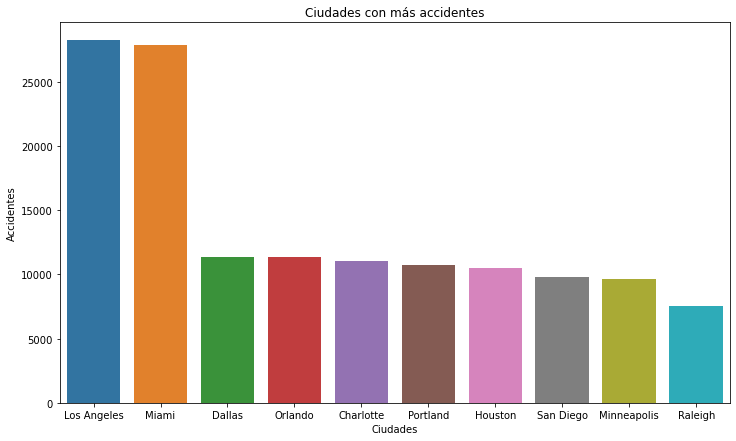

In [5]:
ciudades = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})
top = pd.DataFrame(ciudades.head(10))
fig, ax = plt.subplots(figsize = (12,7))
ax=sns.barplot(y=top['Cases'], x=top['City'])
plt.title('Ciudades con más accidentes')
ax.set_xlabel('Ciudades')
ax.set_ylabel('Accidentes')
plt.show()

In [6]:
estados = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})
fig = px.bar(estados, x="State", y="Cases", barmode="group")
fig.show()

In [7]:
# plotly express
impacto = pd.DataFrame(df['Severity'].value_counts()).reset_index().rename(columns={'index':'Severity', 'Severity':'Cases'})
fig = px.bar(impacto, x="Severity", y="Cases", barmode="group")
fig.show()

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
mensual = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')
month_names = list(calendar.month_name)[1:]
mensual.Month = month_names
fig = px.bar(mensual, x="Month", y="Cases", barmode="group")
fig.show()

In [9]:
diario = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})
fig = px.bar(diario, x="Day", y="Cases", barmode="group")
fig.show()

In [10]:
bache = pd.DataFrame(df['Bump'].value_counts()).reset_index().rename(columns={'index':'Bump', 'Bump':'Cases'})
fig = px.bar(bache, x="Bump", y="Cases", barmode="group")
fig.show()

In [11]:
cruce = pd.DataFrame(df['Crossing'].value_counts()).reset_index().rename(columns={'index':'Crossing', 'Crossing':'Cases'})
fig = px.bar(cruce, x="Crossing", y="Cases", barmode="group")
fig.show()

In [12]:
ceda = pd.DataFrame(df['Give_Way'].value_counts()).reset_index().rename(columns={'index':'Give_Way', 'Give_Way':'Cases'})
fig = px.bar(ceda, x="Give_Way", y="Cases", barmode="group")
fig.show()

In [13]:
cruce = pd.DataFrame(df['Junction'].value_counts()).reset_index().rename(columns={'index':'Junction', 'Junction':'Cases'})
fig = px.bar(cruce, x="Junction", y="Cases", barmode="group")
fig.show()

In [14]:
stop = pd.DataFrame(df['Stop'].value_counts()).reset_index().rename(columns={'index':'Stop', 'Stop':'Cases'})
fig = px.bar(stop, x="Stop", y="Cases", barmode="group")
fig.show()

In [15]:
no_salida = pd.DataFrame(df['No_Exit'].value_counts()).reset_index().rename(columns={'index':'No_Exit', 'No_Exit':'Cases'})
fig = px.bar(no_salida, x="No_Exit", y="Cases", barmode="group")
fig.show()

In [16]:
semaforo = pd.DataFrame(df['Traffic_Signal'].value_counts()).reset_index().rename(columns={'index':'Traffic_Signal', 'Traffic_Signal':'Cases'})
fig = px.bar(semaforo, x="Traffic_Signal", y="Cases", barmode="group")
fig.show()

In [17]:
rotonda = pd.DataFrame(df['Roundabout'].value_counts()).reset_index().rename(columns={'index':'Roundabout', 'Roundabout':'Cases'})
fig = px.bar(rotonda, x="Roundabout", y="Cases", barmode="group")
fig.show()

In [18]:
clima = pd.DataFrame(df['Weather_Condition'].value_counts()).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})
fig = px.bar(clima, x="Weather_Condition", y="Cases", barmode="group")
fig.show()

In [19]:
humedad = pd.DataFrame(df['Humidity(%)'].value_counts()).reset_index().rename(columns={'index':'Humidity(%)', 'Humidity(%)':'Cases'})
fig = px.bar(humedad, x="Humidity(%)", y="Cases", barmode="group")
fig.show()

In [20]:
viento = pd.DataFrame(df['Wind_Speed(mph)'].value_counts()).reset_index().rename(columns={'index':'Wind_Speed(mph)', 'Wind_Speed(mph)':'Cases'})
fig = px.bar(viento, x="Wind_Speed(mph)", y="Cases", barmode="group")
fig.show()

In [21]:
lluvia = pd.DataFrame(df['Precipitation(in)'].value_counts()).reset_index().rename(columns={'index':'Precipitation(in)', 'Precipitation(in)':'Cases'})
fig = px.bar(lluvia, x="Precipitation(in)", y="Cases", barmode="group")
fig.show()

In [22]:
df['Junction'] = df['Junction'].astype('category').cat.codes
df['No_Exit'] = df['No_Exit'].astype('category').cat.codes
df['Railway'] = df['Railway'].astype('category').cat.codes
df['Roundabout'] = df['Roundabout'].astype('category').cat.codes
df['Station'] = df['Station'].astype('category').cat.codes
df['Stop'] = df['Stop'].astype('category').cat.codes
df['Traffic_Calming'] = df['Traffic_Calming'].astype('category').cat.codes
df['Traffic_Signal'] = df['Traffic_Signal'].astype('category').cat.codes
df['Turning_Loop'] = df['Turning_Loop'].astype('category').cat.codes
df['Civil_Twilight'] = df['Civil_Twilight'].astype('category').cat.codes
df['Weather_Condition'] = df['Weather_Condition'].astype('category').cat.codes
df['Amenity'] = df['Amenity'].astype('category').cat.codes
df['Bump'] = df['Bump'].astype('category').cat.codes
df['Crossing'] = df['Crossing'].astype('category').cat.codes
df['Give_Way'] = df['Give_Way'].astype('category').cat.codes
df['ID'] = df['ID'].astype('category').cat.codes
df['Severity'] = df['Severity'].astype('category').cat.codes
df['Start_Time'] = df['Start_Time'].astype('category').cat.codes
df['Distance(mi)'] = df['Distance(mi)'].astype('category').cat.codes
df['Visibility(mi)'] = df['Visibility(mi)'].astype('category').cat.codes
df['Precipitation(in)'] = df['Precipitation(in)'].astype('category').cat.codes

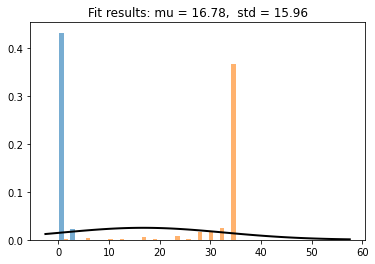

In [23]:
data = df.loc[:, ['Severity', 'Visibility(mi)']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

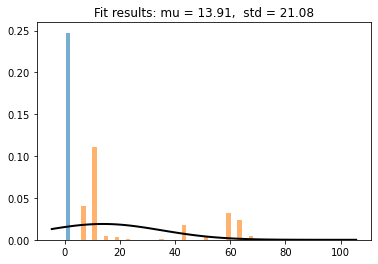

In [24]:
data = df.loc[:, ['Severity', 'Weather_Condition']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

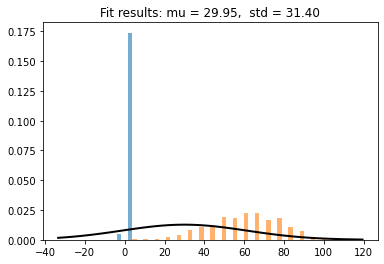

In [25]:
data = df.loc[:, ['Severity', 'Temperature(F)']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

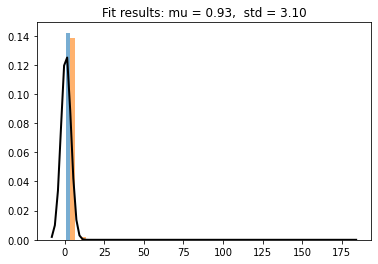

In [26]:
data = df.loc[:, ['Severity', 'Precipitation(in)']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

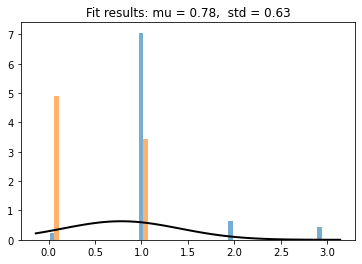

In [27]:
data = df.loc[:, ['Severity', 'Civil_Twilight']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# 0 Dia 1 Noche
plt.show()

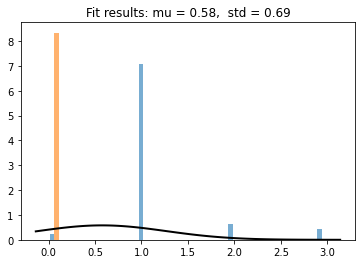

In [28]:
data = df.loc[:, ['Severity', 'Bump']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

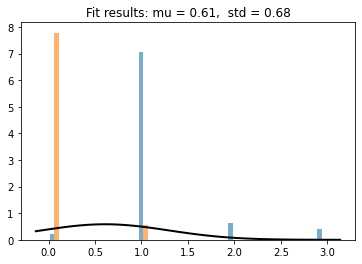

In [29]:
data = df.loc[:, ['Severity', 'Crossing']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

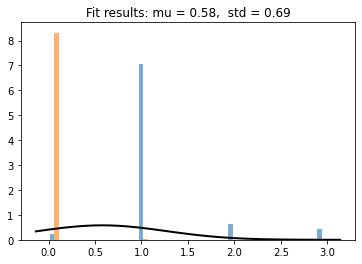

In [30]:
data = df.loc[:, ['Severity', 'Give_Way']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

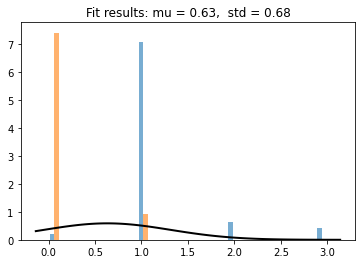

In [31]:
data = df.loc[:, ['Severity', 'Junction']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

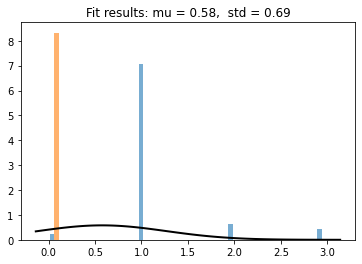

In [32]:
data = df.loc[:, ['Severity', 'No_Exit']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

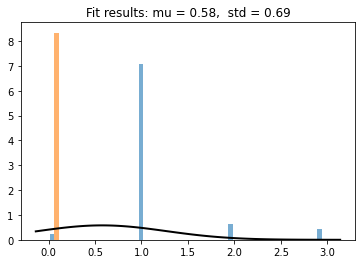

In [33]:
data = df.loc[:, ['Severity', 'Roundabout']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

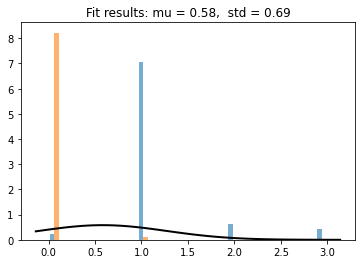

In [34]:
data = df.loc[:, ['Severity', 'Stop']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

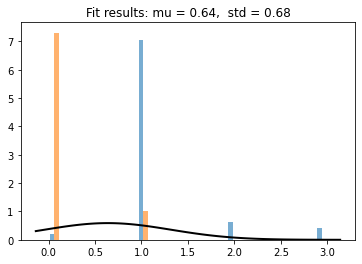

In [35]:
data = df.loc[:, ['Severity', 'Traffic_Signal']]
mu, std = norm.fit(data)
plt.hist(data, bins=25, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [36]:
df = pd.read_csv("Datos/test3.csv")
df = df.drop(["Pressure(in)", "End_Time", "Start_Lat", "Start_Lng", "End_Lat", "End_Lng", "Description", "Number", "Street", "Side", "Zipcode", "Country", "Timezone", "Airport_Code", "Weather_Timestamp", "Wind_Chill(F)", "Sunrise_Sunset", "Nautical_Twilight"], axis = 1)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1935 entries, 0 to 24998
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1935 non-null   object 
 1   Severity                1935 non-null   int64  
 2   Start_Time              1935 non-null   object 
 3   Distance(mi)            1935 non-null   float64
 4   City                    1935 non-null   object 
 5   County                  1935 non-null   object 
 6   State                   1935 non-null   object 
 7   Temperature(F)          1935 non-null   float64
 8   Humidity(%)             1935 non-null   float64
 9   Visibility(mi)          1935 non-null   float64
 10  Wind_Direction          1935 non-null   object 
 11  Wind_Speed(mph)         1935 non-null   float64
 12  Precipitation(in)       1935 non-null   float64
 13  Weather_Condition       1935 non-null   object 
 14  Amenity                 1935 non-null  

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [38]:
print(df.shape)
df.head()

(1935, 29)


,ID,Severity,Start_Time,Distance(mi),City,County,State,Temperature(F),Humidity(%),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Civil_Twilight,Astronomical_Twilight;
0,A-2716600,3,2016-02-08 00:37:08,3.230,Dublin,Franklin,OH,42.1,58.0,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night;
5,A-2716605,3,2016-02-08 07:53:43,0.500,Cincinnati,Hamilton,OH,37.0,93.0,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day;
9,A-2716609,2,2016-02-08 11:51:46,0.521,Cleveland,Cuyahoga,OH,33.1,92.0,0.5,SW,3.5,0.08,Snow,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day;
11,A-2716611,2,2016-02-08 15:16:43,0.826,Westerville,Franklin,OH,32.0,100.0,0.5,West,3.5,0.05,Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day;
12,A-2716612,2,2016-02-08 15:43:50,0.307,Cincinnati,Hamilton,OH,33.8,100.0,3.0,NNW,4.6,0.03,Light Snow,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day;


In [39]:
df['Junction'] = df['Junction'].astype('category').cat.codes
df['No_Exit'] = df['No_Exit'].astype('category').cat.codes
df['Railway'] = df['Railway'].astype('category').cat.codes
df['Roundabout'] = df['Roundabout'].astype('category').cat.codes
df['Station'] = df['Station'].astype('category').cat.codes
df['Stop'] = df['Stop'].astype('category').cat.codes
df['Traffic_Calming'] = df['Traffic_Calming'].astype('category').cat.codes
df['Traffic_Signal'] = df['Traffic_Signal'].astype('category').cat.codes
df['Turning_Loop'] = df['Turning_Loop'].astype('category').cat.codes
df['Civil_Twilight'] = df['Civil_Twilight'].astype('category').cat.codes
#df['Weather_Condition'] = df['Weather_Condition'].astype('category').cat.codes
df['Amenity'] = df['Amenity'].astype('category').cat.codes
df['Bump'] = df['Bump'].astype('category').cat.codes
df['Crossing'] = df['Crossing'].astype('category').cat.codes
df['Give_Way'] = df['Give_Way'].astype('category').cat.codes
#df['ID'] = df['ID'].astype('category').cat.codes
df['Severity'] = df['Severity'].astype('category').cat.codes
#df['Start_Time'] = df['Start_Time'].astype('category').cat.codes
df['Distance(mi)'] = df['Distance(mi)'].astype('category').cat.codes
df['Visibility(mi)'] = df['Visibility(mi)'].astype('category').cat.codes
df['Precipitation(in)'] = df['Precipitation(in)'].astype('category').cat.codes

In [40]:
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

1 columns were label encoded.


In [41]:
df = pd.get_dummies(df, drop_first=True)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_col = list(df.columns)
df_col.remove('Severity')
for col in df_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Severity'] = pd.to_numeric(df['Severity'], downcast='float')
df.head()

Severity  Distance(mi)  Temperature(F)  Humidity(%)  Visibility(mi)  \
0          1      0.911405        0.433109     0.553191        1.000000   
5          1      0.426680        0.384023     0.925532        1.000000   
9          0      0.443992        0.346487     0.914894        0.111111   
11         0      0.636456        0.335900     1.000000        0.111111   
12         0      0.258656        0.353224     1.000000        0.611111   

    Wind_Speed(mph)  Precipitation(in)  Amenity  Bump  Crossing  Give_Way  \
0          0.282609           0.000000      0.0   0.0       0.0       0.0   
5          0.282609           0.021739      0.0   0.0       0.0       0.0   
9          0.095109           0.173913      0.0   0.0       0.0       0.0   
11         0.095109           0.108696      0.0   0.0       0.0       0.0   
12         0.125000           0.065217      0.0   0.0       0.0       0.0   

    Junction  No_Exit  Railway  Roundabout  Station  Stop  Traffic_Calming  \
0        0.0      0.0      0.0         0.0      0.0   0.0              0.0   
5        0.0      0.0      0.0         0.0      0.0   0.0              0.0   
9        1.0      0.0      0.0         0.0      0.0   0.0              0.0   
11       0.0      0.0      0.0         0.0      0.0   0.0              0.0   
12       0.0      0.0      0.0         0.0      0.0   0.0              0.0   

    Traffic_Signal  Turning_Loop  Civil_Twilight  Astronomical_Twilight;  \
0              0.0           0.0             1.0                     1.0   
5              0.0           0.0             0.0                     0.0   
9              0.0           0.0             0.0                     0.0   
11             0.0           0.0             0.0                     0.0   
12             0.0           0.0             0.0                     0.0   

    ID_A-2716605  ID_A-2716609  ID_A-2716611  ID_A-2716612  ID_A-2716614  \
0            0.0           0.0           0.0           0.0           0.0   
5            1.0           0.0           0.0           0.0           0.0   
9            0.0           1.0           0.0           0.0           0.0   
11           0.0           0.0           1.0           0.0           0.0   
12           0.0           0.0           0.0           1.0           0.0   

    ID_A-2716615  ID_A-2716620  ID_A-2716622  ID_A-2716623  ID_A-2716624  \
0            0.0           0.0           0.0           0.0           0.0   
5            0.0           0.0           0.0           0.0           0.0   
9            0.0           0.0           0.0           0.0           0.0   
11           0.0           0.0           0.0           0.0           0.0   
12           0.0           0.0           0.0           0.0           0.0   

    ID_A-2716625  ID_A-2716626  ID_A-2716630  ID_A-2716632  ID_A-2716633  \
0            0.0           0.0           0.0           0.0           0.0   
5            0.0           0.0           0.0           0.0           0.0   
9            0.0           0.0           0.0           0.0           0.0   
11           0.0           0.0           0.0           0.0           0.0   
12           0.0           0.0           0.0           0.0           0.0   

    ID_A-2716634  ID_A-2716639  ID_A-2716640  ID_A-2716642  ID_A-2716643  \
0            0.0           0.0           0.0           0.0           0.0   
5            0.0           0.0           0.0           0.0           0.0   
9            0.0           0.0           0.0           0.0           0.0   
11           0.0           0.0           0.0           0.0           0.0   
12           0.0           0.0           0.0           0.0           0.0   

    ID_A-2716644  ID_A-2716645  ID_A-2716648  ID_A-2716649  ID_A-2716651  \
0            0.0           0.0           0.0           0.0           0.0   
5            0.0           0.0           0.0           0.0           0.0   
9            0.0           0.0           0.0           0.0           0.0   
11           0.0           0.0  

In [43]:
target = df['Severity'].copy()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=7, stratify=target)

In [45]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [46]:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
df_resultado = pd.DataFrame(columns=col)
i=0
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_resultado.loc[i] = [name, round(cv_auc_results.mean()*100,2), round(cv_auc_results.std()*100,2), round(cv_acc_results.mean()*100,2), round(cv_acc_results.std()*100,2)]
    i += 1
df_resultado.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,NaN,NaN,97.61,1.08
1,Random Forest,NaN,NaN,96.32,1.99
2,SVM,NaN,NaN,70.35,2.93
3,KNN,NaN,NaN,87.08,2.06
4,Decision Tree Classifier,NaN,NaN,100.00,0.00
5,Gaussian NB,NaN,NaN,95.80,1.01
